## Dataset Setup
1) Download Dataset Urbansound8K -- https://urbansounddataset.weebly.com/download-urbansound8k.html

2) Dataset Size is 6 GB it takes almost 2 hours to download it as a zip file then unzip it and Upload it to the google drive.

3) Now Mount Google Drive


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Install Librosa library

1.   Librosa Library is used to read input audio signals.
2.   It has a fixed sample rate of 22050 Hz.
3.   It is maintaining Audio data between -1 to 1 value.
4.   It converts different signals to 1D mono channel signal.

In [4]:
!pip install librosa

Import one of the audio file and try to plot the audio signal.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
filename = '/content/drive/MyDrive/AI_dataset/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

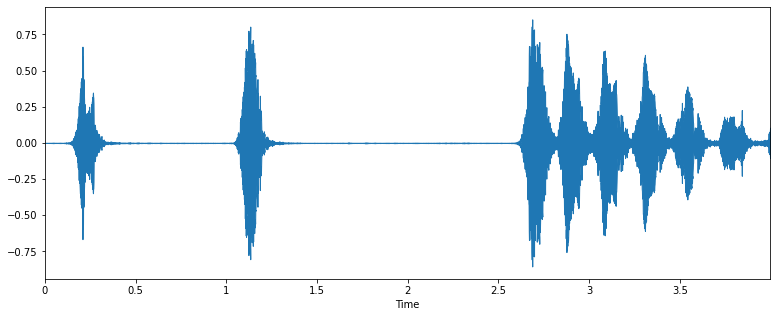

In [9]:
# Display the audio signal
plt.figure(figsize=(13,5))
data, sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)

In [10]:
mfccs=librosa.feature.mfcc(y=data, sr= sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [11]:
mfccs

array([[-5.2127631e+02, -5.1920068e+02, -5.1859546e+02, ...,
        -4.3563806e+02, -3.9264105e+02, -3.5284695e+02],
       [ 1.4337622e+01,  1.7177921e+01,  1.8103882e+01, ...,
         1.1375925e+02,  1.5130569e+02,  1.7731265e+02],
       [ 1.3526174e+01,  1.6120741e+01,  1.7259270e+01, ...,
         6.4274483e+01,  6.2837280e+01,  5.8452560e+01],
       ...,
       [ 3.5389400e-01, -3.3235970e+00, -4.8356538e+00, ...,
        -5.2698832e+00, -1.1491921e+00, -1.8506811e+00],
       [ 4.5192480e-01, -3.0670590e+00, -4.6473045e+00, ...,
        -3.4223983e+00,  2.5510237e+00,  1.9448149e+00],
       [ 4.3578243e-01, -2.7977815e+00, -4.4126105e+00, ...,
        -2.6713738e+00,  1.3704147e+00,  5.2174580e-01]], dtype=float32)

## Load .CSV file into metadata variable which will contains Mapping to the dataset and contains final class.

In [12]:
import pandas as pd
import os
import librosa
audio_dataset_path='/content/drive/MyDrive/AI_dataset/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/AI_dataset/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


## Extract Features

In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [14]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

jackhammer          1000
air_conditioner     1000
children_playing    1000
street_music        1000
dog_bark            1000
drilling            1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [15]:
import numpy as np
from tqdm import tqdm
import os 
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
#audio_dataset_path='/content/drive/MyDrive/AI_dataset/UrbanSound8K/audio'
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


3555it [30:59,  1.79it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:12:47,  2.45it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:12:48,  3.22it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:16:36,  1.90it/s]


In [16]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[-209.93578, 63.42263, -123.69025, -60.019207,...",dog_bark
1,"[-417.29105, 100.148506, -43.869255, 51.953114...",children_playing
2,"[-452.77457, 113.24303, -38.501553, 44.06281, ...",children_playing
3,"[-406.86542, 92.06992, -25.97457, 43.714275, 1...",children_playing
4,"[-440.05148, 104.7528, -43.601677, 51.62308, 1...",children_playing


In [17]:
# split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [18]:
# Label Encoding used to get final class label
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

## Split Data into Train and Test Datasets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[-1.24804222e+02,  1.04074791e+02, -1.41900110e+01, ...,
         5.11126089e+00, -3.27641654e+00,  4.68427706e+00],
       [-5.56166172e+00,  7.99243622e+01,  3.17723417e+00, ...,
        -3.10786653e+00, -5.52765369e+00, -1.24421585e+00],
       [-4.08249588e+01, -1.21112919e+01, -8.24007797e+00, ...,
         2.33748436e+00, -1.13885355e+00,  3.15122962e+00],
       ...,
       [-4.26155884e+02,  9.16995850e+01,  4.18934965e+00, ...,
         1.05063570e+00,  4.79902148e-01,  9.34532404e-01],
       [-1.37633438e+02,  1.25209015e+02, -2.25489178e+01, ...,
         1.62041438e+00, -2.23517537e+00, -5.80052614e-01],
       [-4.18620483e+02,  2.07397217e+02,  6.88129950e+00, ...,
        -4.04676056e+00, -4.68362570e+00, -3.44565958e-01]], dtype=float32)

In [21]:
X_train.shape

(6985, 40)

In [22]:
X_test.shape

(1747, 40)

In [23]:
y_train.shape

(6985, 10)

In [24]:
y_test.shape

(1747, 10)

# Build the model

In [25]:
# No of Classes = 10 
import tensorflow as tf
print (tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

2.7.0


In [26]:

Dense(100)

In [27]:
model=Sequential()

# First Layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

## Define loss function, metrics and Optimizer 

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

## Model Training
Trained the model over 100 epochs for demonstration purposes:

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100 #Number of iterations
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only= True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data= (X_test, y_test), callbacks =[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
210/219 [===========================>..] - ETA: 0s - loss: 12.3954 - accuracy: 0.1141
Epoch 00001: val_loss improved from inf to 2.29235, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 4s 7ms/step - loss: 12.0555 - accuracy: 0.1144 - val_loss: 2.2924 - val_accuracy: 0.1179
Epoch 2/100
212/219 [============================>.] - ETA: 0s - loss: 2.6955 - accuracy: 0.1203
Epoch 00002: val_loss improved from 2.29235 to 2.28387, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 2.6898 - accuracy: 0.1201 - val_loss: 2.2839 - val_accuracy: 0.1145
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 2.3647 - accuracy: 0.1175
Epoch 00003: val_loss improved from 2.28387 to 2.27633, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3648 - accuracy: 0.1174 - val_loss: 2.2763 - val_ac

In [31]:
test_accuracy=model.evaluate(X_test, y_test, verbose=0)
print(f"Loss:{test_accuracy[0]} -- Accuracy: {test_accuracy[1]*100}%")

Loss:0.7293620705604553 -- Accuracy: 76.35947465896606%


Let's plot the training and validation loss curves to check how your model has improved during training:

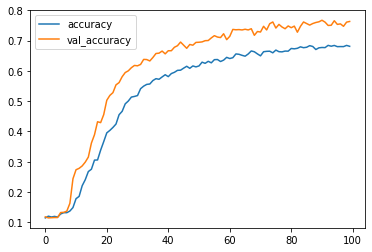

In [32]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

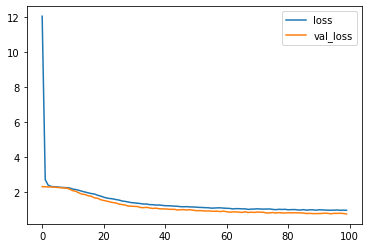

In [33]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

## Predict Classes based on given Files 

In [34]:
import IPython.display as ipd
import librosa
import librosa.display

Predicted Class for given sound File: dog_bark


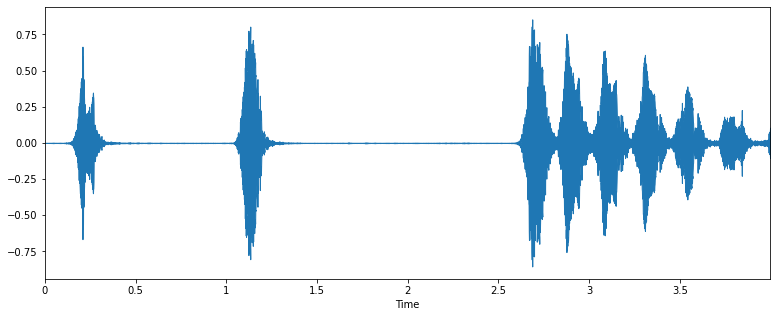

In [36]:
filename='/content/drive/MyDrive/AI_dataset/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_best') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
# print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=np.argmax((model.predict(mfccs_scaled_features)),axis=1)
# print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(f'Predicted Class for given sound File: {prediction_class[0]}')

#display the audio signals
plt.figure(figsize=(13,5))
data, sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)

Predicted Class for given sound File: street_music


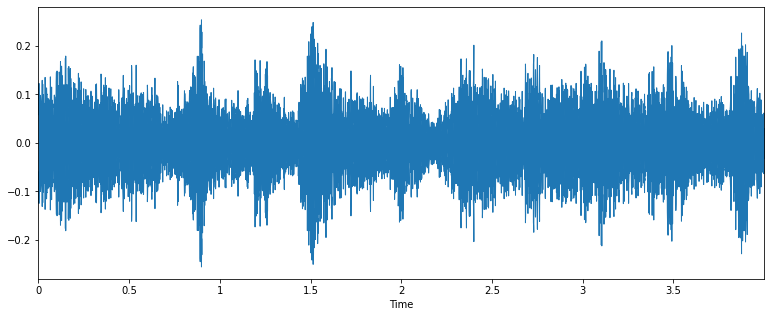

In [37]:
filename="/content/drive/MyDrive/AI_dataset/UrbanSound8K/audio/fold7/101848-9-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_best') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
predicted_label=np.argmax((model.predict(mfccs_scaled_features)),axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(f'Predicted Class for given sound File: {prediction_class[0]}')

#display the audio signals
plt.figure(figsize=(13,5))
data, sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)